In [520]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adam
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [521]:
data=pd.read_csv('/Users/miteshwandhare/Downloads/Crystal_structure.csv')


In [522]:
data.replace('-', np.nan, inplace=True)
data.drop(columns=['Compound','A','B'], inplace=True)

data

,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,False,0,0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,NaN,0.800000,cubic
1,False,0,0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,NaN,0.678571,orthorhombic
2,False,0,0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,NaN,0.385714,cubic
3,False,0,0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,NaN,0.371429,orthorhombic
4,False,0,0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,NaN,0.664286,orthorhombic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,False,1,5,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952455,0.442857,cubic
5325,False,NaN,NaN,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,NaN,0.642857,cubic
5326,False,NaN,NaN,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,NaN,0.678571,orthorhombic
5327,False,NaN,NaN,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,NaN,0.528571,cubic


In [523]:
data['In literature'] = data['In literature'].replace({False: 0, True: 1})
data['Lowest distortion'] = data['Lowest distortion'].replace({'cubic': 0, 'orthorhombic': 1,'tetragonal':2,'rhombohedral':3
                                                               })
data=data.astype(float)

In [524]:
data

,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,0.0,0.0,0.0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,NaN,0.800000,0.0
1,0.0,0.0,0.0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,NaN,0.678571,1.0
2,0.0,0.0,0.0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,NaN,0.385714,0.0
3,0.0,0.0,0.0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,NaN,0.371429,1.0
4,0.0,0.0,0.0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,NaN,0.664286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.0,1.0,5.0,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952,0.442857,0.0
5325,0.0,NaN,NaN,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,NaN,0.642857,0.0
5326,0.0,NaN,NaN,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,NaN,0.678571,1.0
5327,0.0,NaN,NaN,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,NaN,0.528571,0.0


In [539]:
# Apply KNNImputer to impute missing values
imputer = KNNImputer(n_neighbors=7)  
data[['τ', 'Lowest distortion']]= pd.DataFrame(imputer.fit_transform(data[['τ','Lowest distortion']]), columns=['τ','Lowest distortion'])  # Impute missing values

data[['v(A)', 'v(B)']] = data[['v(A)', 'v(B)']].ffill()

In [540]:
print(data.columns)

Index(['In literature', 'v(A)', 'v(B)', 'r(AXII)(Å)', 'r(AVI)(Å)', 'r(BVI)(Å)',
       'EN(A)', 'EN(B)', 'l(A-O)(Å)', 'l(B-O)(Å)', 'ΔENR', 'tG', 'τ', 'μ',
       'Lowest distortion'],
      dtype='object')


In [541]:
data

,In literature,v(A),v(B),r(AXII)(Å),r(AVI)(Å),r(BVI)(Å),EN(A),EN(B),l(A-O)(Å),l(B-O)(Å),ΔENR,tG,τ,μ,Lowest distortion
0,0.0,0.0,0.0,1.12,1.12,1.12,1.10,1.10,0.00000,0.000000,-3.248000,0.707107,-12.022418,0.800000,0.0
1,0.0,0.0,0.0,1.12,1.12,0.95,1.10,1.93,0.00000,2.488353,-2.565071,0.758259,2.137350,0.678571,1.0
2,0.0,0.0,0.0,1.12,1.12,0.54,1.10,1.61,0.00000,1.892894,-1.846714,0.918510,-12.022418,0.385714,0.0
3,0.0,0.0,0.0,1.12,1.12,0.52,1.10,2.18,0.00000,1.932227,-1.577429,0.928078,2.137350,0.371429,1.0
4,0.0,0.0,0.0,1.12,1.12,0.93,1.10,2.54,0.00000,2.313698,-2.279786,0.764768,2.137350,0.664286,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5324,0.0,1.0,5.0,0.89,0.72,0.62,1.33,2.36,2.38342,1.745600,-1.572214,0.801621,5.228952,0.442857,0.0
5325,0.0,1.0,5.0,0.89,0.72,0.90,1.33,1.22,2.38342,2.235124,-2.489571,0.704032,-12.022418,0.642857,0.0
5326,0.0,1.0,5.0,0.89,0.72,0.95,1.33,1.10,2.38342,2.223981,-2.626821,0.689053,2.137350,0.678571,1.0
5327,0.0,1.0,5.0,0.89,0.72,0.74,1.33,1.65,2.38342,2.096141,-2.035750,0.756670,-12.022418,0.528571,0.0


In [543]:
# Create a boolean mask indicating NaN values in each column
nan_mask = data.isna().any()

# Extract columns with NaN values
columns_with_nan = data.columns[nan_mask].tolist()

# Print columns with NaN values
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [544]:
count_distortion_nan = data['v(A)'].isna().sum()

print("Count of NaN values in 'v(A)' column:", count_distortion_nan)


Count of NaN values in 'v(A)' column: 0


In [545]:
count_distortion_nan = data['v(B)'].isna().sum()

print("Count of NaN values in 'v(B)' column:", count_distortion_nan)


Count of NaN values in 'v(B)' column: 0


In [546]:
count_distortion_nan = data['τ'].isna().sum()

print("Count of NaN values in 'τ' column:", count_distortion_nan)

Count of NaN values in 'τ' column: 0


In [547]:
print(data.to_string())



      In literature  v(A)  v(B)  r(AXII)(Å)  r(AVI)(Å)  r(BVI)(Å)  EN(A)  EN(B)  l(A-O)(Å)  l(B-O)(Å)      ΔENR        tG           τ         μ  Lowest distortion
0               0.0   0.0   0.0        1.12      1.120      1.120   1.10   1.10   0.000000   0.000000 -3.248000  0.707107  -12.022418  0.800000           0.000000
1               0.0   0.0   0.0        1.12      1.120      0.950   1.10   1.93   0.000000   2.488353 -2.565071  0.758259    2.137350  0.678571           1.000000
2               0.0   0.0   0.0        1.12      1.120      0.540   1.10   1.61   0.000000   1.892894 -1.846714  0.918510  -12.022418  0.385714           0.000000
3               0.0   0.0   0.0        1.12      1.120      0.520   1.10   2.18   0.000000   1.932227 -1.577429  0.928078    2.137350  0.371429           1.000000
4               0.0   0.0   0.0        1.12      1.120      0.930   1.10   2.54   0.000000   2.313698 -2.279786  0.764768    2.137350  0.664286           1.000000
5               0.0   

In [548]:
corr_matrix=data.corr()
print(corr_matrix)

                   In literature      v(A)      v(B)  r(AXII)(Å)  \
In literature           1.000000  0.125120  0.085622    0.183138   
v(A)                    0.125120  1.000000  0.507452   -0.093538   
v(B)                    0.085622  0.507452  1.000000    0.100299   
r(AXII)(Å)              0.183138 -0.093538  0.100299    1.000000   
r(AVI)(Å)               0.157123 -0.143748  0.034311    0.937492   
r(BVI)(Å)              -0.132859 -0.053236 -0.089489   -0.005210   
EN(A)                  -0.186487  0.035298 -0.072613   -0.627417   
EN(B)                   0.047653 -0.062781 -0.049354    0.009343   
l(A-O)(Å)               0.112333  0.260152  0.363119    0.327965   
l(B-O)(Å)              -0.018337  0.268280  0.295000   -0.001212   
ΔENR                    0.014930  0.062243  0.002187   -0.455477   
tG                      0.231562 -0.043945  0.128628    0.798824   
τ                       0.052047  0.059526  0.129755    0.087985   
μ                      -0.132841 -0.053233 -0.08

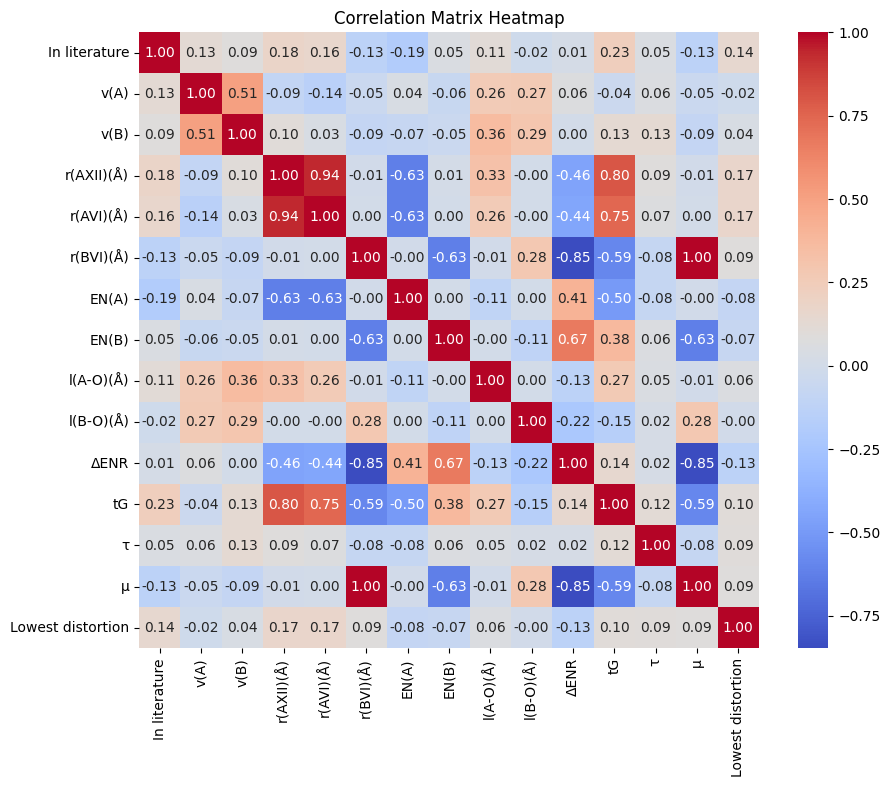

In [549]:
# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [550]:
X = data.drop(columns=['Lowest distortion'])
y = data['Lowest distortion']    
y

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5324    0.0
5325    0.0
5326    1.0
5327    0.0
5328    0.0
Name: Lowest distortion, Length: 5329, dtype: float64

In [551]:
#split the dataset into features(X) and target variable(y)
df = data.copy()
X = df.drop(columns=['Lowest distortion'])
y = df['Lowest distortion' ]
y

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5324    0.0
5325    0.0
5326    1.0
5327    0.0
5328    0.0
Name: Lowest distortion, Length: 5329, dtype: float64

Training model using SGD optimizer...
34/34 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8687
Test accuracy with SGD optimizer: 0.8687
Training model using RMSprop optimizer...
34/34 [==============================] - 0s 1ms/step - loss: 0.4481 - accuracy: 0.8630
Test accuracy with RMSprop optimizer: 0.8630
Training model using Adadelta optimizer...
34/34 [==============================] - 0s 1ms/step - loss: 0.8090 - accuracy: 0.7561
Test accuracy with Adadelta optimizer: 0.7561
Training model using Adam optimizer...
34/34 [==============================] - 0s 806us/step - loss: 0.3765 - accuracy: 0.8677
Test accuracy with Adam optimizer: 0.8677


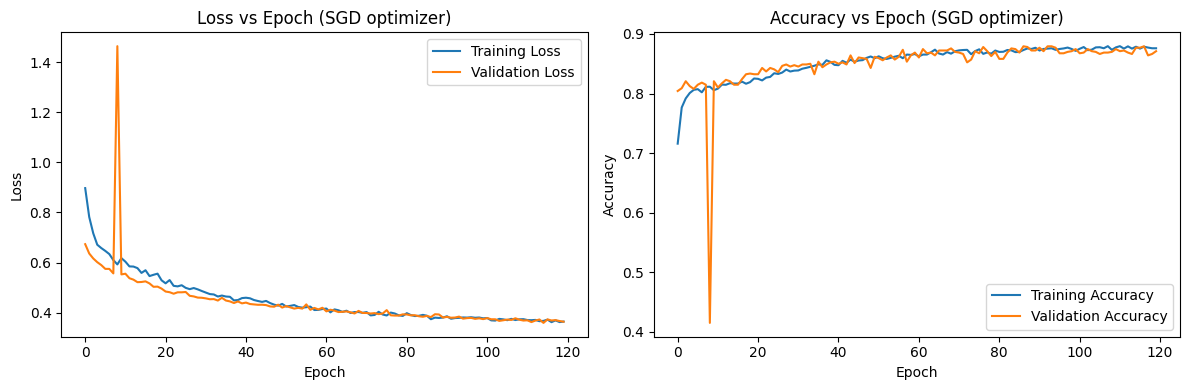

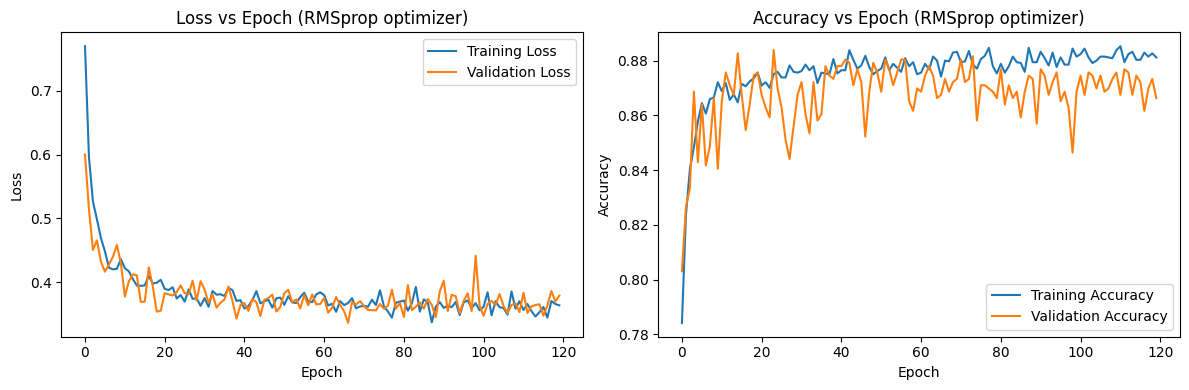

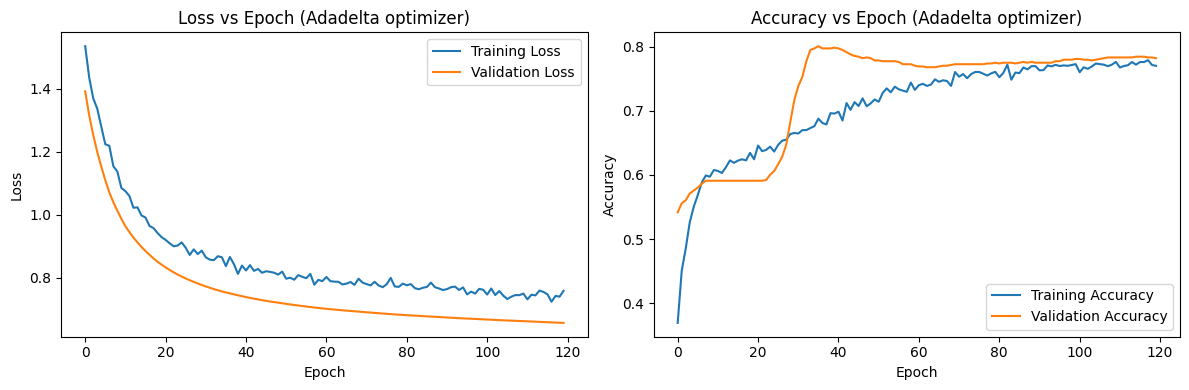

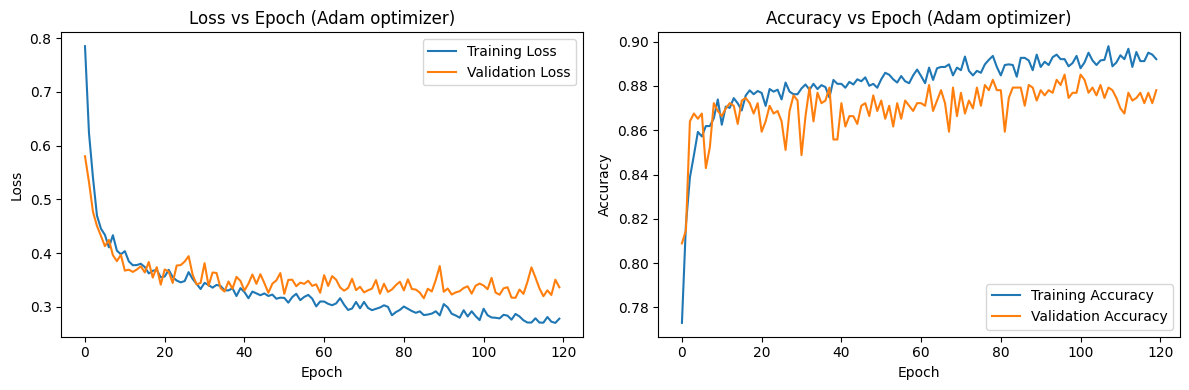

In [552]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, RMSprop, Adadelta, Adam

# Spliting the dataset into train test and validation dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

def build_model(input_shape, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_shape,)),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

def train_model(model, X_train, y_train, X_val, y_val, optimizer):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=120, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    return history

def evaluate_model(model, X_test, y_test):
    _, test_accuracy = model.evaluate(X_test, y_test)
    return test_accuracy

optimizers = {'SGD': SGD(), 'RMSprop': RMSprop(), 'Adadelta': Adadelta(), 'Adam': Adam()}

# Train and evaluate the model using each optimizer
results = {}
for optimizer_name, optimizer in optimizers.items():
    print(f"Training model using {optimizer_name} optimizer...")
    
    # Reset the model to ensure a fresh start
    model = build_model(input_shape=X_train.shape[1], num_classes=len(np.unique(y_train)))
    
    # Train the model
    history = train_model(model, X_train, y_train, X_val, y_val, optimizer)
    
    # Evaluate on test data
    test_accuracy = evaluate_model(model, X_test, y_test)
    results[optimizer_name] = {
        'history': history.history,
        'test_accuracy': test_accuracy
    }
    print(f"Test accuracy with {optimizer_name} optimizer: {test_accuracy:.4f}")

# Plot the results
for optimizer_name, result in results.items():
    history = result['history']
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'Loss vs Epoch ({optimizer_name} optimizer)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history['accuracy'], label='Training Accuracy')
    plt.plot(history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Accuracy vs Epoch ({optimizer_name} optimizer)')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
